In [2]:
import requests
import os
from dotenv import find_dotenv, load_dotenv

dotenv_path = find_dotenv()
load_dotenv(dotenv_path)
WEATHER_KEY = os.getenv("WEATHER_KEY")

url = "http://api.weatherapi.com/v1/forecast.json"

params = {
    'key': WEATHER_KEY,
    'days': 1,
    'q': 'Auckland',
    'aqi': 'no',
    'alerts': 'no'
}

In [3]:
response = requests.get(url, params = params)
data = response.json()

# Extracting relevant data
temp_c = data["current"]["temp_c"]
wind_kph = data["current"]["wind_kph"]
humidity = data["current"]["humidity"]
feelslike_c = data["current"]["feelslike_c"]
condition = data["current"]["condition"]["text"]
icon_url = "https:" + data["current"]["condition"]["icon"]

forecast_date = data["forecast"]["forecastday"][0]["date"]
hours_data = data["forecast"]["forecastday"][0]["hour"]

In [12]:
from datetime import datetime, timedelta

start_time = datetime.strptime(f"{data['forecast']['forecastday'][0]['date']} 08:00", "%Y-%m-%d %H:%M")
end_time = datetime.strptime(f"{data['forecast']['forecastday'][0]['date']} 22:00", "%Y-%m-%d %H:%M")
print(start_time, end_time)

2024-10-29 08:00:00 2024-10-29 22:00:00


In [13]:
forecast_12h = [
    {
        "time": hour["time"],
        "temp_c": hour["temp_c"],
        "precip_mm": hour["precip_mm"],
        "chance_of_rain": hour["chance_of_rain"]
    }
    for hour in hours_data
    if start_time <= datetime.strptime(hour["time"], "%Y-%m-%d %H:%M") < end_time
]
forecast_12h

[{'time': '2024-10-29 08:00',
  'temp_c': 15.3,
  'precip_mm': 0.07,
  'chance_of_rain': 100},
 {'time': '2024-10-29 09:00',
  'temp_c': 16.2,
  'precip_mm': 0.05,
  'chance_of_rain': 100},
 {'time': '2024-10-29 10:00',
  'temp_c': 17.0,
  'precip_mm': 0.02,
  'chance_of_rain': 71},
 {'time': '2024-10-29 11:00',
  'temp_c': 18.2,
  'precip_mm': 0.0,
  'chance_of_rain': 0},
 {'time': '2024-10-29 12:00',
  'temp_c': 18.6,
  'precip_mm': 0.0,
  'chance_of_rain': 0},
 {'time': '2024-10-29 13:00',
  'temp_c': 19.1,
  'precip_mm': 0.0,
  'chance_of_rain': 0},
 {'time': '2024-10-29 14:00',
  'temp_c': 19.5,
  'precip_mm': 0.22,
  'chance_of_rain': 100},
 {'time': '2024-10-29 15:00',
  'temp_c': 19.5,
  'precip_mm': 0.04,
  'chance_of_rain': 71},
 {'time': '2024-10-29 16:00',
  'temp_c': 18.9,
  'precip_mm': 0.02,
  'chance_of_rain': 80},
 {'time': '2024-10-29 17:00',
  'temp_c': 17.5,
  'precip_mm': 0.06,
  'chance_of_rain': 100},
 {'time': '2024-10-29 18:00',
  'temp_c': 16.1,
  'precip_mm':

In [17]:
times = [entry["time"].split(" ")[1] for entry in forecast_12h]
temperatures = [entry["temp_c"] for entry in forecast_12h]
precipitations = [entry["precip_mm"] for entry in forecast_12h]

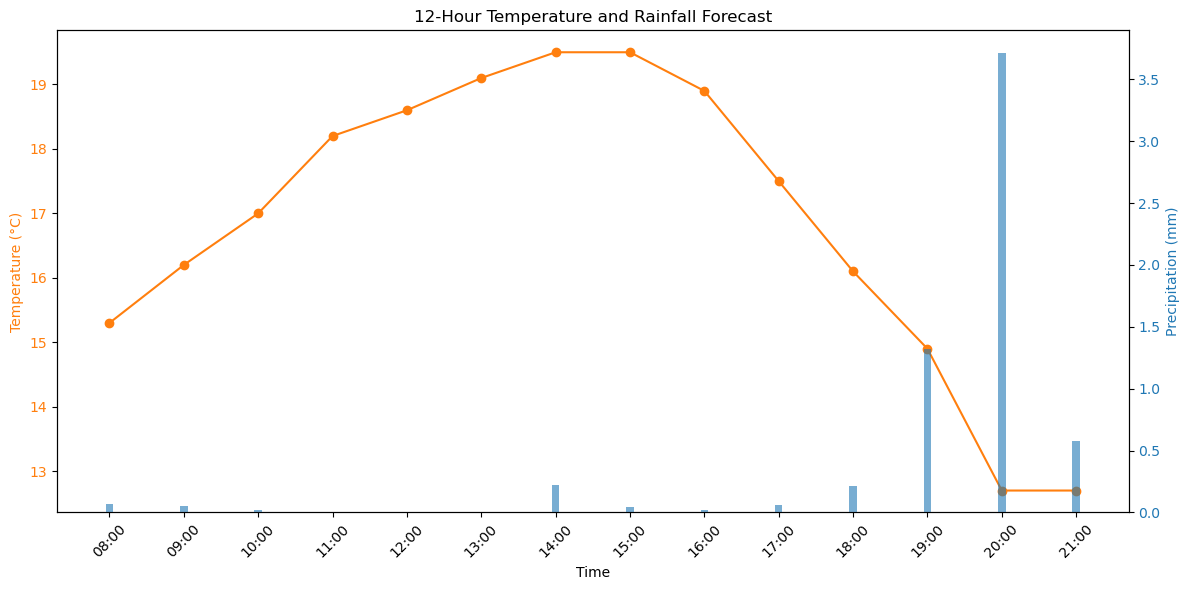

In [21]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature on the primary y-axis
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color='tab:orange')
ax1.plot(times, temperatures, color='tab:orange', label='Temperature (°C)', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:orange')

# Create a second y-axis for the precipitation
ax2 = ax1.twinx()
ax2.set_ylabel("Precipitation (mm)", color='tab:blue')
ax2.bar(times, precipitations, color='tab:blue', alpha=0.6, label='Precipitation (mm)', width=0.1)
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Formatting the x-axis for better readability
ax1.set_xticks(times)
ax1.set_xticklabels(times, rotation=45)

# Add a title and legend
plt.title("12-Hour Temperature and Rainfall Forecast")
fig.tight_layout()
plt.show()

In [22]:
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)
GOOGLE_KEY = os.getenv("GOOGLE_KEY")
home_address = os.getenv("home_address")

url = 'https://maps.googleapis.com/maps/api/distancematrix/json'

origin = home_address
destination = [
    '-36.85581, 174.76637', # University Address
    '-36.84801, 174.7578'
]
destination_str = '|'.join(destination)

params = {
    'origins': origin,
    'destinations': destination_str,
    'departure_time': 'now',
    'mode': 'driving',
    'key': GOOGLE_KEY
}

response = requests.get(url, params = params)

data = response.json()

results = []

In [20]:
data

{'destination_addresses': ['70 Symonds Street, Grafton, Auckland 1010, New Zealand',
  '186 Victoria Street West, Auckland CBD, Auckland 1010, New Zealand'],
 'origin_addresses': ['12 San Diego Court, Henderson, Auckland 0612, New Zealand'],
 'rows': [{'elements': [{'distance': {'text': '20.2 km', 'value': 20165},
     'duration': {'text': '27 mins', 'value': 1596},
     'duration_in_traffic': {'text': '24 mins', 'value': 1468},
     'status': 'OK'},
    {'distance': {'text': '19.1 km', 'value': 19124},
     'duration': {'text': '26 mins', 'value': 1558},
     'duration_in_traffic': {'text': '23 mins', 'value': 1388},
     'status': 'OK'}]}],
 'status': 'OK'}

In [23]:
for i, element in enumerate(data["rows"][0]["elements"]):
    try:
        travel_time = element["duration_in_traffic"]["text"]
        
        destination_info = {
            'destination_name': data['destination_addresses'][i],
            'time_taken': travel_time
        }
        results.append(destination_info)
        
    except KeyError:
        print(f"Destination {i+1} - Error: Could not retrieve travel time with traffic.")

In [24]:
results

[{'destination_name': '70 Symonds Street, Grafton, Auckland 1010, New Zealand',
  'time_taken': '24 mins'},
 {'destination_name': '186 Victoria Street West, Auckland CBD, Auckland 1010, New Zealand',
  'time_taken': '23 mins'}]

In [3]:
import requests
url = ('https://newsapi.org/v2/top-headlines?'
       'country=nz&'
       'apiKey=e0f3ff194b1c4fa482e63ba07d758815')
response = requests.get(url)
print (response.json())

{'status': 'ok', 'totalResults': 0, 'articles': []}


In [ ]:
import serpapi
import json

params = {
  "api_key": NEWS_KEY,
  "engine": "google",
  "q": "news",
  "location": "New Zealand",
  "google_domain": "google.co.nz",
  "gl": "nz",
  "hl": "en",
  "tbm": "nws",
  "num": "12"
}

search = serpapi.search(params)
search

{
    "search_metadata": {
        "id": "6729b36323a4b52d4ab2db08",
        "status": "Success",
        "json_endpoint": "https://serpapi.com/searches/9532bf73593b23db/6729b36323a4b52d4ab2db08.json",
        "created_at": "2024-11-05 05:55:47 UTC",
        "processed_at": "2024-11-05 05:55:47 UTC",
        "google_url": "https://www.google.co.nz/search?q=news&oq=news&uule=w+CAIQICILTmV3IFplYWxhbmQ&hl=en&gl=nz&num=12&tbm=nws&sourceid=chrome&ie=UTF-8",
        "raw_html_file": "https://serpapi.com/searches/9532bf73593b23db/6729b36323a4b52d4ab2db08.html",
        "total_time_taken": 1.31
    },
    "search_parameters": {
        "engine": "google",
        "q": "news",
        "location_requested": "New Zealand",
        "location_used": "New Zealand",
        "google_domain": "google.co.nz",
        "hl": "en",
        "gl": "nz",
        "num": "12",
        "device": "desktop",
        "tbm": "nws"
    },
    "search_information": {
        "query_displayed": "news",
        "total_r

In [10]:
for article in search['news_results']:
    print(f"Title: {article['title']}")
    print(f"Link: {article['link']}")
    print(f"Date: {article['date']}")
    print(f"Source: {article['source']}\n")

Title: The Post
Link: https://www.thepost.co.nz/nz-news/360475372/sh2-night-closures-ahead
Date: 11 hours ago
Source: The Post (Wellington)

Title: Costello advice: Heated debate sees tensions boil over in the House
Link: https://www.rnz.co.nz/news/political/532925/costello-advice-heated-debate-sees-tensions-boil-over-in-the-house
Date: 2 hours ago
Source: RNZ

Title: Shredded chicken identified as likely cause of Canterbury University student sickness outbreak
Link: https://www.nzherald.co.nz/nz/shredded-chicken-identified-as-likely-cause-of-canterbury-university-student-sickness-outbreak/2H6DAUEEYREPXCTOUM5DY4OSCI/
Date: 58 minutes ago
Source: NZ Herald

Title: Two new tunnels: Simeon Brown reveals government's preferred plan to lower congestion
Link: https://www.rnz.co.nz/news/national/532926/two-new-tunnels-simeon-brown-reveals-government-s-preferred-plan-to-lower-congestion
Date: 1 hour ago
Source: RNZ

Title: Here's what Harris and Trump each need to win the US election
Link: htt

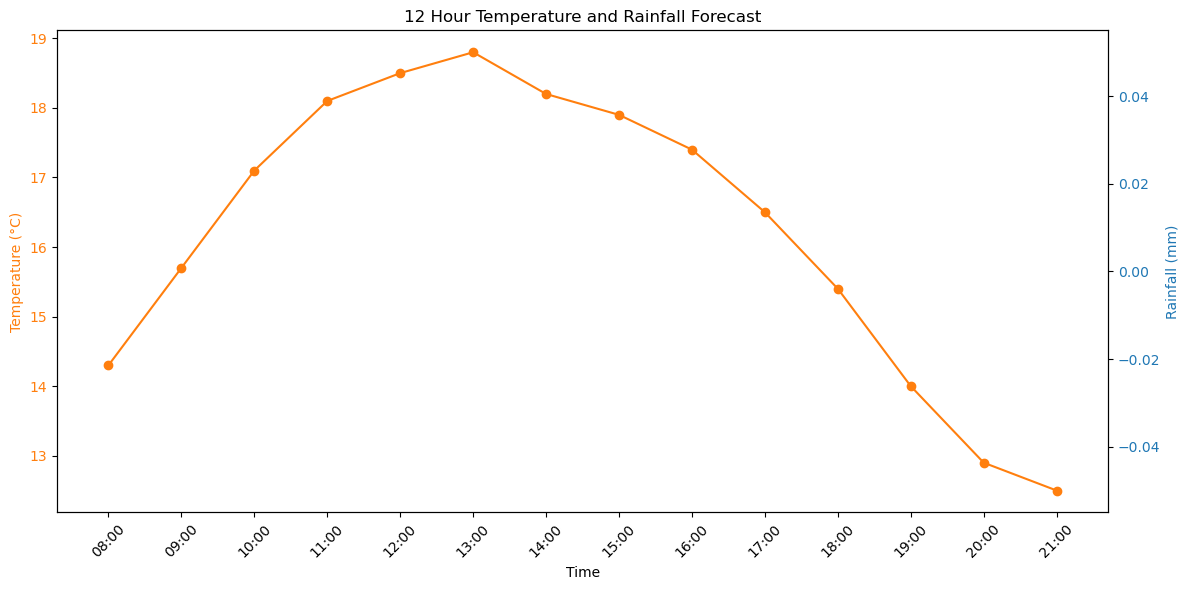

In [51]:
import smtplib
import os
from dotenv import find_dotenv, load_dotenv
from data_extraction.quote_of_the_day import getapi
from data_extraction.word_of_the_day import get_word_of_the_day
from data_extraction.weather import get_weather_data
from data_extraction.traffic import get_traffic_data
from data_extraction.news import get_news_articles

# Getting relevant information
# Word of the day
word_url = 'https://www.dictionary.com/e/word-of-the-day/'
word, definition = get_word_of_the_day(word_url)

# Quote of the day
api_url = "https://zenquotes.io/api/random/"
quote, author = getapi(api_url)

# Weather
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)
WEATHER_KEY = os.getenv("WEATHER_KEY")
weather_url = "http://api.weatherapi.com/v1/forecast.json"
params = {
    'key': WEATHER_KEY,
    'days': 1,
    'q': 'Auckland',
    'aqi': 'no',
    'alerts': 'no'
}
temp_c, wind_kph, humidity, feelslike_c, condition, icon_url, graph = get_weather_data(weather_url, params)

# Traffic
GOOGLE_KEY = os.getenv("GOOGLE_KEY")
home_address = os.getenv("home_address")
traffic_url = 'https://maps.googleapis.com/maps/api/distancematrix/json'
origin = home_address
destination = [
    '-36.85581, 174.76637', # University Address
    '-36.84801, 174.7578' # Work Address
]
destination_str = '|'.join(destination)
params = {
    'origins': origin,
    'destinations': destination_str,
    'departure_time': 'now',
    'mode': 'driving',
    'key': GOOGLE_KEY
}
traffic = get_traffic_data(traffic_url, params)

# News
NEWS_KEY = os.getenv("NEWS_KEY")
params = {
  "api_key": NEWS_KEY,
  "engine": "google",
  "q": "news",
  "location": "New Zealand",
  "google_domain": "google.co.nz",
  "gl": "nz",
  "hl": "en",
  "tbm": "nws",
  "num": "5"
}
articles = get_news_articles(params)

In [52]:
import base64
from io import BytesIO
import matplotlib.pyplot as plt

def get_base64_encoded_image(fig):
    """Convert a Matplotlib figure to a Base64 encoded string."""
    buffer = BytesIO()
    fig.savefig(buffer, format="png")
    buffer.seek(0)
    img_str = base64.b64encode(buffer.read()).decode("utf-8")
    plt.close(fig)  # Close the figure to prevent it from displaying
    return img_str

graph_base64 = get_base64_encoded_image(graph)

In [53]:
traffic_list = ""
for entry in traffic:
    destination = entry['destination_name']
    time_taken = entry['time_taken']
    traffic_list += f"<li>{destination}: {time_taken}</li>"

In [55]:
def generate_news_html(articles):
    news_items = ""
    
    for article in articles:
        title = article['title']
        link = article['link']
        # date = article['date']
        
        # Create an HTML list item for each article
        news_items += f'<li><a href="{link}" target="_blank">{title}</a></li>\n'
        
    return news_items
news_html = generate_news_html(articles)
news_html

'<li><a href="https://www.rnz.co.nz/news/political/532925/costello-advice-heated-debate-sees-tensions-boil-over-in-the-house" target="_blank">Costello advice: Heated debate sees tensions boil over in the House</a></li>\n<li><a href="https://www.nzherald.co.nz/nz/shredded-chicken-identified-as-likely-cause-of-canterbury-university-student-sickness-outbreak/2H6DAUEEYREPXCTOUM5DY4OSCI/" target="_blank">Shredded chicken identified as likely cause of Canterbury University student sickness outbreak</a></li>\n<li><a href="https://www.rnz.co.nz/news/national/532926/two-new-tunnels-simeon-brown-reveals-government-s-preferred-plan-to-lower-congestion" target="_blank">Two new tunnels: Simeon Brown reveals government\'s preferred plan to lower congestion</a></li>\n<li><a href="https://www.stuff.co.nz/nz-news/360474921/man-who-repeatedly-slashed-ex-wifes-throat-mcdonalds-claimed-he-got-carried-away" target="_blank">Man who repeatedly slashed ex-wife’s throat at McDonald’s claimed he got ‘carried aw

In [56]:
html_message = f"""
<!DOCTYPE html>
<html>
<head>
    <style>
        body {{
            font-family: Arial, sans-serif;
            color: #333333;
            margin: 0;
            padding: 0;
        }}
        .container {{
            padding: 20px;
        }}
        h2 {{
            color: #4CAF50;
        }}
        .quote, .word, .weather, .traffic, .news {{
            padding: 10px;
            margin-bottom: 20px;
            border-bottom: 1px solid #dddddd;
        }}
        .news-article {{
            margin-bottom: 10px;
        }}
        .weather-icon {{
            vertical-align: middle;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h2>Daily Update</h2>
        
        <div class="quote">
            <h3>Quote of the Day</h3>
            <p>"{quote}" - <em>{author}</em></p>
        </div>
        
        <div class="word">
            <h3>Word of the Day</h3>
            <p><strong>{word}</strong>: {definition}</p>
        </div>
        
        <div class="weather">
            <h3>Weather in Auckland</h3>
            <p><strong>Temperature:</strong> {temp_c}°C, feels like {feelslike_c}°C</p>
            <p><strong>Condition:</strong> {condition}</p>
            <img src="{icon_url}" alt="Weather Icon" class="weather-icon"/>
            <p><strong>Humidity:</strong> {humidity}%</p>
            <p><strong>Wind Speed:</strong> {wind_kph} km/h</p>
            <img src="data:image/png;base64,{graph_base64}" alt="Weather Graph" style="width:600px; height:auto;>
        </div>
        
        <div class="traffic">
            <h3>Traffic Updates</h3>
            <p>From home to:</p>
            <ul>
                {traffic_list}
            </ul>
        </div>
        
        <div class="news">
            <h3>Top News in New Zealand</h3>
            <ul>
                {news_html}
            </ul>
        </div>
    </div>
</body>
</html>
"""
with open("daily_update.html", "w") as file:
    file.write(html_message)

In [6]:
from datetime import datetime

# Get today's date in a desired format, e.g., "November 5, 2024"
today_date = datetime.now().strftime("%B %d")
print(f"{today_date} Summary")

November 05 Summary
